# Introduction

This notebook expands upon the first three notebooks in a series that builds a framework for modeling polymer chain adsorption on nanoparticles. <br><br>In this (short) notebook, we will present a streamlined version of the sweep-of-sweeps workflow shown in notebook 3.

# Imports, evironment, setting some variables

In [1]:
import numpy as np
from copy import copy
import os

### set to single GPU

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

### default arguments

In [3]:
#specify arguments for model generation
args_default = {}
args_default["ld"] = 1024
args_default["vd"] = 512
args_default["radius_nm"] = 17
args_default["PhysSize_nm_per_voxel"] = 0.5
args_default["S0"] = 0.5
args_default["S_slope_per_nm"] = -0.02

args_default["euler_style"] = "radial" # one of "radial", "tangential_lat", "tangential_lon"


args_default["energies"] = np.array([260, 270])
args_default["energies"] = np.append(args_default["energies"], np.arange(275, 283, 1), axis=0)
args_default["energies"] = np.append(args_default["energies"], np.arange(283, 291, 0.1), axis=0)
args_default["energies"] = np.append(args_default["energies"], np.arange(291, 305, 1), axis=0)

# Import indexes of refraction for polymers and SiO2

For some variety, we will demonstrate the workflow using PMMA as the polymer.

In [4]:
from pandas import read_csv
from NRSS.morphology import OpticalConstants
pmma_uni = read_csv("pmma_dan.txt", sep=" ")
sio2_uni = read_csv("siox_iso_NIST_Jan2024.txt", sep=",")

args_default["oc_polymer"] = OpticalConstants.calc_constants(args_default["energies"], pmma_uni, name="PMMA")
args_default["oc_particle"] = OpticalConstants.calc_constants(args_default["energies"], sio2_uni, name="SiO2")

CyRSoXS
Size of Real               : 4
Maximum Number Of Material : 32
 __________________________________________________________________________________________________
|                                 Thanks for using CyRSoXS                                        |
|--------------------------------------------------------------------------------------------------|
|  Copyright          : Iowa State University                                                      |
|  License            : NIST                                                                       |
|  Acknowledgement    : ONR MURI                                                                   |
|                                                                                                  |
|  Developed at Iowa State University in collaboration with NIST                                   |
|                                                                                                  |
|  Please cite the fol

<div class="alert alert-block alert-success"><b>Tip:</b> Note I've now made these indices the default ones. This isn't critical, it's mostly so when we copy args_default below, the indices come along for the ride.
</div>

<Axes: title={'center': 'SiO2'}, xlabel='Energy'>

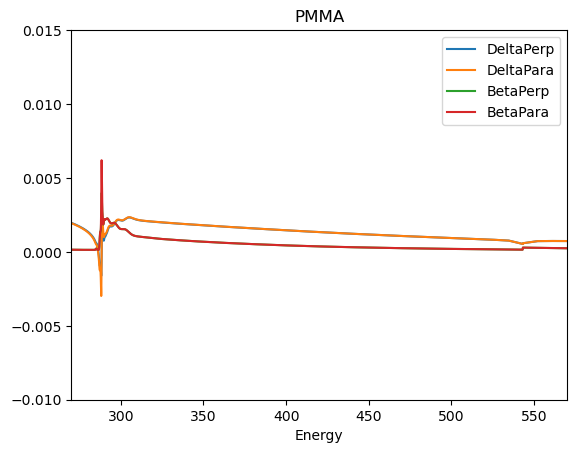

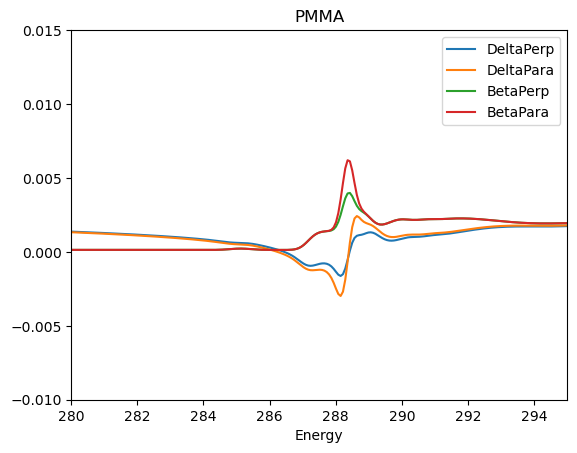

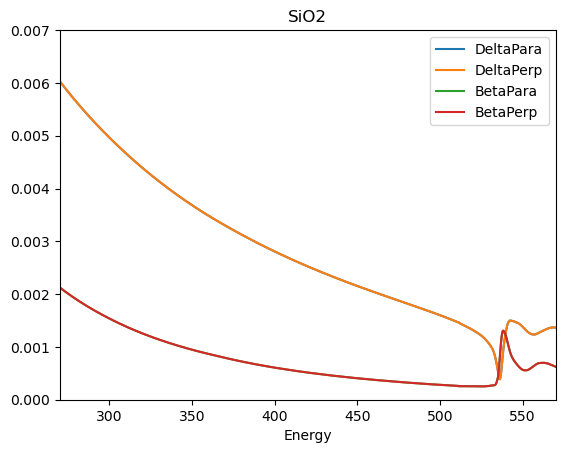

In [5]:
pmma_uni.plot(x="Energy", xlim = (270,570), ylim = (-.01,0.015), title = "PMMA")
pmma_uni.plot(x="Energy", xlim = (280,295), ylim = (-.01,0.015), title = "PMMA")

sio2_uni.plot(x="Energy", xlim = (270,570), ylim = (0,0.007), title = "SiO2")

<div class="alert alert-block alert-success"><b>Tip:</b> Even when you know them by heart, it is a best-practice to always plot the index of refraction that you're using in your model, just in case it has changed somehow on disk, or perhaps there was a Python library update that caused it to import weird.
</div>

# Function from earlier notebooks

We've additionally moved adsorbed_polymer_sweep from notebook 3 to the python file polymer_adsorption_functions01.py, so it can be accessed just by importing.

In [6]:
# note that it finds the .py file because it's in the same directory as the notebook
# if you want to have the *.py in a different directory, you'll need to change the python path to find the import
from polymer_adsorption_functions01 import adsorbed_polymer_sweep, EulerStyle

/home/deand/mambaforge/envs/deand/lib/python3.10/site-packages/PyHyperScattering/util.py:4: UserWarning: Could not import package for interactive integration utils.  Install holoviews and scikit-image.
  from PyHyperScattering import IntegrationUtils


# Running a sweep of sweeps

And... that's all that's necessary to generate a large amount simulation data for a new polymer. <br><br>Additional sweeps could be added below when you add new variables or new styles to the S-field or Euler angles.

In [7]:
swept_arg_list = ["radius_nm", "S0", "S_slope_per_nm"]
values_list = [
    np.linspace(10, 45, 30), # these are the swept values for radius_nm
    np.linspace(0, 1, 30), # these are the swept values for S0
    np.linspace(-0.1, 0.0, 30), #these are the swept values for S_slope_per_nm
]

args = copy(args_default)
args["euler_style"] = EulerStyle.TANGENTIAL_LAT

file_prefix = "tut_pmma_ssweeps_"

# zip below creates a list of pairs from two lists
for swept_arg, values in zip(swept_arg_list, values_list):
    adsorbed_polymer_sweep(
        args=args, swept_arg=swept_arg, values=values, file_prefix=file_prefix
    )

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]

All material checks have passed
All objects have been validated successfully. You can run your simulation

 [STAT] Executing: 

Number of CUDA devices:1
[INFO] [GPU = Quadro RTX 8000] : 260eV -> 304eV
 [STAT] Energy = 260 starting 
 [STAT] Energy = 270 starting 
 [STAT] Energy = 275 starting 
 [STAT] Energy = 276 starting 
 [STAT] Energy = 277 starting 
 [STAT] Energy = 278 starting 
 [STAT] Energy = 279 starting 
 [STAT] Energy = 280 starting 
 [STAT] Energy = 281 starting 
 [STAT] Energy = 282 starting 
 [STAT] Energy = 283 starting 
 [STAT] Energy = 283.1 starting 
 [STAT] Energy = 283.2 starting 
 [STAT] Energy = 283.3 starting 
 [STAT] Energy = 283.4 starting 
 [STAT] Energy = 283.5 starting 
 [STAT] Energy = 283.6 starting 
 [STAT] Energy = 283.7 starting 
 [STAT] Energy = 283.8 starting 
 [STAT] Energy = 283.9 starting 
 [STAT] Energy = 284 starting 
 [STAT] Energy = 284.1 starting 
 [STAT] Energy = 284.2 starting 
 [STAT] Energy = 284.3 starting 
 [STAT] Energy = 284.4 starting

  0%|          | 0/104 [00:00<?, ?it/s]